# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist



1. numpy: Used for numerical operations, such as creating arrays and performing mathematical operations.
2. matplotlib.pyplot: Used for plotting and visualizing data.
3. keras.datasets.mnist: Provides access to the MNIST dataset for digit recognition.

# 2. Loading and Preprocessing the Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1. mnist.load_data(): Loads the MNIST dataset, splitting it into training and test sets.
2. x_train: Training images.
3. y_train: Labels for training images.
4. x_test: Test images.
5. y_test: Labels for test images.

In [ ]:
X_train = x_train.reshape(x_train.shape[0], -1).T / 255.0
Y_train = y_train
X_test = x_test.reshape(x_test.shape[0], -1).T / 255.0
Y_test = y_test

10000

1. x_train.reshape(x_train.shape[0], -1).T: Reshapes training images into a 2D array where each column is an image flattened into a vector. Transposes the matrix so that each column represents an image.
2. / 255.0: Normalizes pixel values to be between 0 and 1.
3. X_train, Y_train, X_test, Y_test: Store the preprocessed training and test data.

In [ ]:
dev_size = 1000
X_dev = X_train[:, :dev_size]
Y_dev = Y_train[:dev_size]
X_train = X_train[:, dev_size:]
Y_train = Y_train[dev_size:]


- dev_size = 1000: Specifies the number of samples for the development (validation) set.  

- X_dev, Y_dev: Create the development set from the first 1000 samples of the training data.

- X_train, Y_train: Update training data to exclude the development set.


# 3. Initializing Parameters

In [ ]:
def init_params(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2


- np.random.randn(hidden_size, input_size) * 0.01: Initializes weight matrices W1 and W2 with small random values from a normal distribution.

- np.zeros((hidden_size, 1)): Initializes bias vectors b1 and b2 to zeros.

- return W1, b1, W2, b2: Returns the initialized parameters.

# 4. Activation Functions

In [ ]:
def ReLU(Z):
    return np.maximum(0, Z)


np.maximum(0, Z): Applies the ReLU activation function, setting all negative values to zero.

In [ ]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)


* np.exp(Z - np.max(Z, axis=0, keepdims=True)): Computes the exponential of each element in Z, with a subtraction of the maximum value for numerical stability.

- exp_Z / np.sum(exp_Z, axis=0, keepdims=True): Computes the softmax output, normalizing the exponentials so they sum to 1.


# 5. Forward Propagation

In [ ]:
def forward_prop(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


- W1.dot(X) + b1: Computes the linear combination for the first layer.
- ReLU(Z1): Applies the ReLU activation function.
- W2.dot(A1) + b2: Computes the linear combination for the second layer.
- softmax(Z2): Applies the softmax function to get the output probabilities.

# 6. Backward Propagation

In [ ]:
# Categorical value into binary -  Not Related to the actual code
a = np.eye(10)[Y_train]
print(Y_train[:10])
for i in range(10):
    print(f"For {i} : {a[i]}")


In [ ]:
def backward_prop(X, Y, Z1, A1, A2, W2):
    m = X.shape[1]
    one_hot_Y = np.eye(10)[Y].T # Here it converts the categorical value into binary value with the help of identity matrix
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


- one_hot_Y = np.eye(10)[Y].T: Converts labels to one-hot encoding.

- dZ2 = A2 - one_hot_Y: Computes the gradient for the output layer.

- dW2, db2: Computes gradients for weights and biases in the output layer.

- dZ1 = W2.T.dot(dZ2) * (Z1 > 0): Computes gradients for the hidden layer, using the derivative of ReLU.

- dW1, db1: Computes gradients for weights and biases in the hidden layer.


# 7. Updating Parameters

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2



W1 -= alpha * dW1: Updates weights and biases by subtracting a fraction of the gradients, scaled by the learning rate alpha.

# 8. Prediction and Accuracy

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)


np.argmax(A2, axis=0): Returns the indices of the maximum values in A2 (predicted labels).

In [ ]:
def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)


np.mean(predictions == Y): Calculates the proportion of correct predictions.


# 9. Gradient Descent

In [ ]:
def gradient_descent(X, Y, alpha, iterations, hidden_size):
    input_size = X.shape[0]
    output_size = 10
    W1, b1, W2, b2 = init_params(input_size, hidden_size, output_size)

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_prop(X, Y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {accuracy:.3f}")

    return W1, b1, W2, b2


- input_size, hidden_size, output_size: Dimensions for the network.

- for i in range(iterations): Iterates through training epochs.

- forward_prop, backward_prop, update_params: Perform forward propagation, backward propagation, and parameter updates.

- print(f"Iteration {i}: Accuracy = {accuracy:.3f}"): Prints accuracy every 10 iterations.


# 10. Training the Model

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.1, iterations=500, hidden_size=64)


Iteration 0: Accuracy = 0.075
Iteration 10: Accuracy = 0.220
Iteration 20: Accuracy = 0.347
Iteration 30: Accuracy = 0.414
Iteration 40: Accuracy = 0.418
Iteration 50: Accuracy = 0.443
Iteration 60: Accuracy = 0.522
Iteration 70: Accuracy = 0.627
Iteration 80: Accuracy = 0.692
Iteration 90: Accuracy = 0.724
Iteration 100: Accuracy = 0.754
Iteration 110: Accuracy = 0.777
Iteration 120: Accuracy = 0.794
Iteration 130: Accuracy = 0.808
Iteration 140: Accuracy = 0.819
Iteration 150: Accuracy = 0.828
Iteration 160: Accuracy = 0.837
Iteration 170: Accuracy = 0.844
Iteration 180: Accuracy = 0.851
Iteration 190: Accuracy = 0.857
Iteration 200: Accuracy = 0.861
Iteration 210: Accuracy = 0.866
Iteration 220: Accuracy = 0.869
Iteration 230: Accuracy = 0.872
Iteration 240: Accuracy = 0.875
Iteration 250: Accuracy = 0.877
Iteration 260: Accuracy = 0.879
Iteration 270: Accuracy = 0.882
Iteration 280: Accuracy = 0.884
Iteration 290: Accuracy = 0.885
Iteration 300: Accuracy = 0.887
Iteration 310: Accu

gradient_descent: Trains the model with specified parameters (learning rate, number of iterations, hidden layer size).

# 11. Testing Predictions

In [ ]:
def test_prediction(index, X, Y, W1, b1, W2, b2):
    current_image = X[:, index, None]
    prediction = get_predictions(forward_prop(current_image, W1, b1, W2, b2)[-1])
    label = Y[index]
    print(f"Prediction: {prediction[0]}, Label: {label}")

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest') # It is used to display data as a image
    plt.show()


- current_image = X[:, index, None]: Extracts an image and reshapes it for prediction.
- get_predictions: Gets the predicted label.
- print(f"Prediction: {prediction[0]}, Label: {label}"): Prints the prediction and actual label.
- current_image.reshape((28, 28)) * 255: Reshapes and scales the image for visualization.
- plt.imshow: Displays the image.

# 12. Testing Multiple Predictions

Prediction: 0, Label: 0


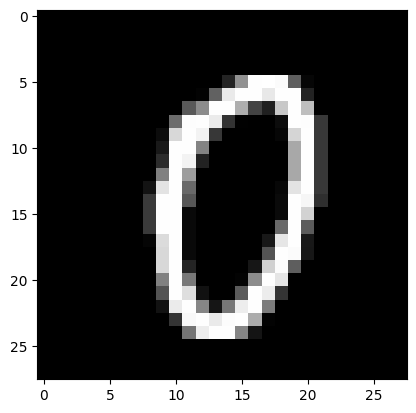

Prediction: 7, Label: 7


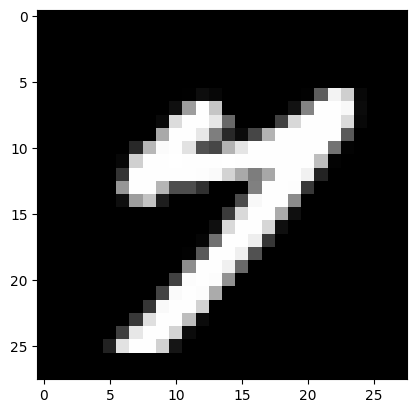

Prediction: 1, Label: 1


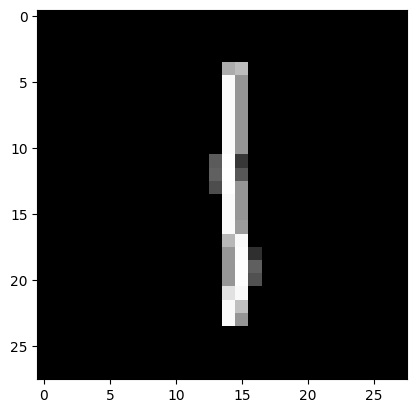

Prediction: 1, Label: 1


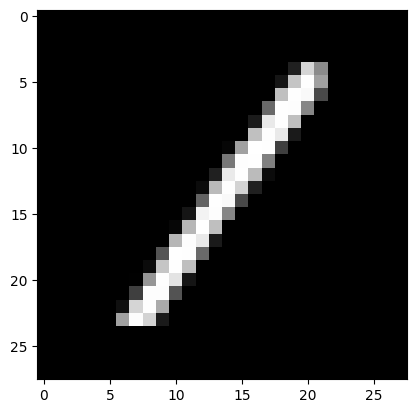

In [ ]:
for i in range(4):
    test_prediction(i, X_train, Y_train, W1, b1, W2, b2)


for i in range(4): Tests and displays predictions for the first 4 images in the training set.

# 13. Evaluating on the Test Set

In [ ]:
test_predictions = get_predictions(forward_prop(X_test, W1, b1, W2, b2)[-1])
print(f"Test set accuracy: {get_accuracy(test_predictions, Y_test):.3f}")


Test set accuracy: 0.904


- get_predictions(forward_prop(X_test, W1, b1, W2, b2)[-1]): Computes predictions on the test set.

- print(f"Test set accuracy: {get_accuracy(test_predictions, Y_test):.3f}"): Prints the accuracy on the test set.